### 步骤1 安装并引入必要的库

In [1]:
%matplotlib inline
import zipfile
import os
import errno
import torchvision.utils as vutils
from tensorboardX import SummaryWriter
from IPython import display
from matplotlib import pyplot as plt
import torch
import torchvision
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
import numpy as np
from utils import Logger

### 步骤2 载入数据

In [2]:
batch_size = 100
#对图片数据转张量并正则化
trans = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5,), (.5,))
        ])
#载入fashion-mnist数据集
fmnist = torchvision.datasets.FashionMNIST(root="./", train=True, transform=trans, download=False)
#读取数据量大小
indices = range(len(fmnist))
#内存原因缩减数据量（原训练集数据量为60000，缩减为30000）
indices_train = indices[:30000]
sampler_train = torch.utils.data.sampler.SubsetRandomSampler(indices_train)
data_loader = torch.utils.data.DataLoader(dataset=fmnist, batch_size=batch_size, sampler=sampler_train)
num_batches = len(data_loader)

### 步骤3 定义辅助函数

In [3]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

def noise(size):
    n = Variable(torch.randn(size, 100))
    return n

num_test_samples = 16
test_noise = noise(num_test_samples)

### 步骤4 定义判别器网络

In [4]:
class DiscriminatorNet(torch.nn.Module):
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 28*28
        n_out = 1
        
        self.hidden1 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3))
        self.hidden2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3))
        self.hidden3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3))
        self.out = torch.nn.Linear(256, n_out)

    def forward(self, x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.out(x)
        return x

### 步骤5 定义生成器网络

In [5]:
class GeneratorNet(torch.nn.Module):
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 28*28
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2))
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2))
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2))
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh())

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x

### 步骤6 权重clip过大

In [ ]:
discriminator1 = DiscriminatorNet()
generator1 = GeneratorNet()
d_optimizer1 = optim.RMSprop(discriminator.parameters(), lr=0.0002)
g_optimizer1 = optim.RMSprop(generator.parameters(), lr=0.0002)

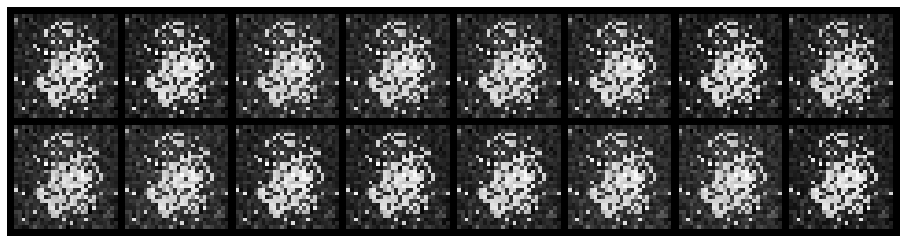

Epoch: [0/10], Batch Num: [0/300]
判别器损失: 0.0156, 生成器损失: -0.1046
D(x): -0.0116, D(G(z)): 0.0040


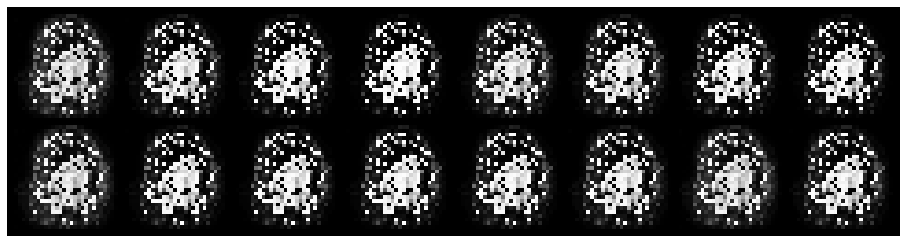

Epoch: [0/10], Batch Num: [100/300]
判别器损失: -28.4380, 生成器损失: -2104.4524
D(x): 2342.2703, D(G(z)): 2313.8323


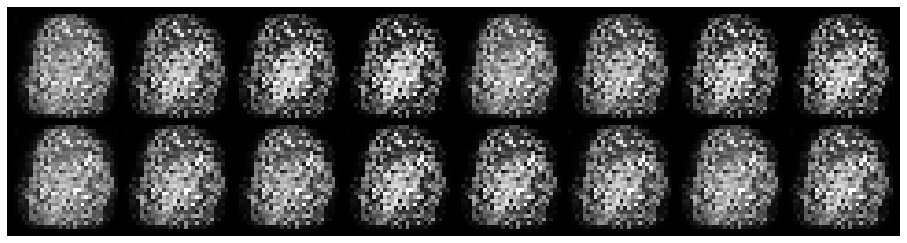

Epoch: [0/10], Batch Num: [200/300]
判别器损失: -342.1091, 生成器损失: -2303.9651
D(x): 2672.9187, D(G(z)): 2330.8096


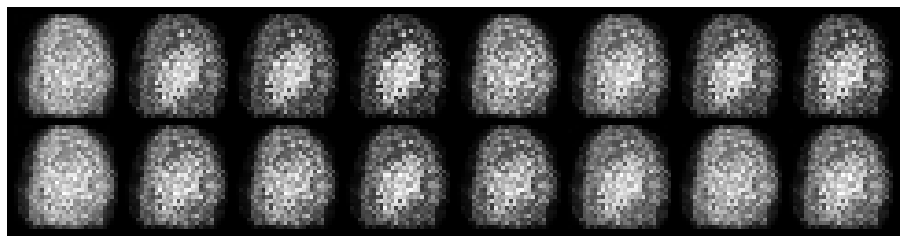

Epoch: [1/10], Batch Num: [0/300]
判别器损失: -484.5640, 生成器损失: -1331.1587
D(x): 1964.8899, D(G(z)): 1480.3259


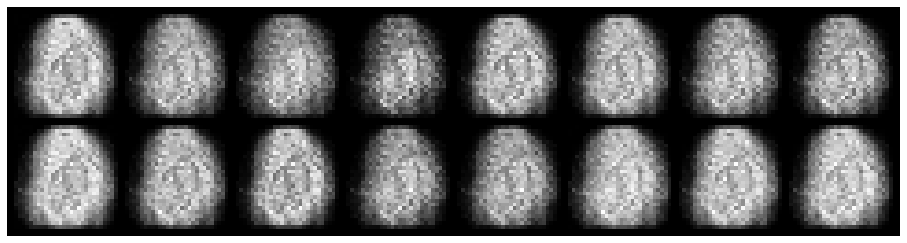

Epoch: [1/10], Batch Num: [100/300]
判别器损失: -933.0588, 生成器损失: -1197.2870
D(x): 2296.5154, D(G(z)): 1363.4565


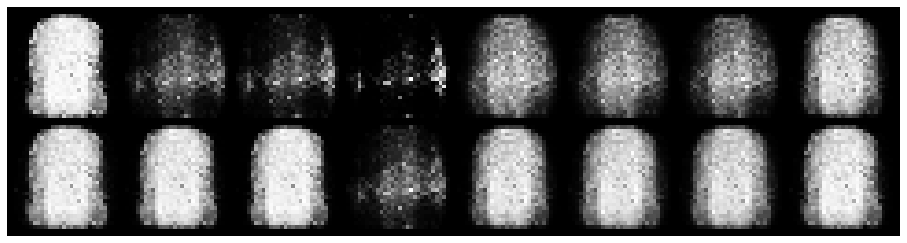

Epoch: [1/10], Batch Num: [200/300]
判别器损失: 124.5122, 生成器损失: -3045.8779
D(x): 2895.2134, D(G(z)): 3019.7256


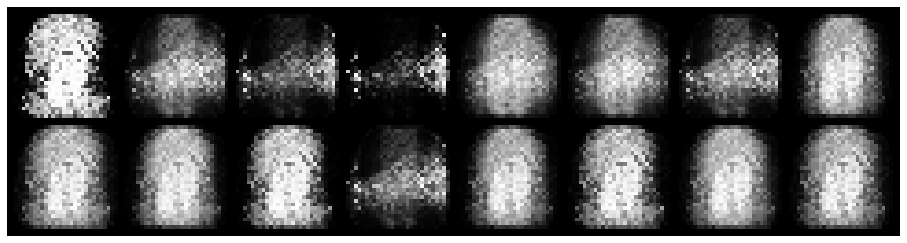

Epoch: [2/10], Batch Num: [0/300]
判别器损失: -721.6525, 生成器损失: -11.0252
D(x): 374.0971, D(G(z)): -347.5554


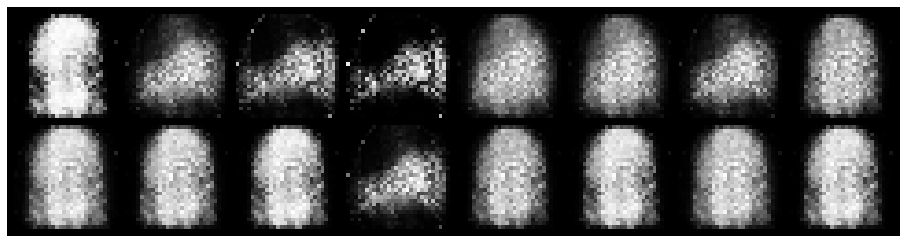

Epoch: [2/10], Batch Num: [100/300]
判别器损失: -801.4158, 生成器损失: -1340.8860
D(x): 2095.3245, D(G(z)): 1293.9087


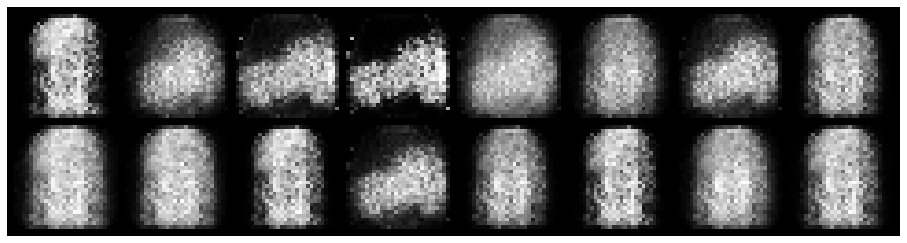

Epoch: [2/10], Batch Num: [200/300]
判别器损失: -1282.3903, 生成器损失: -852.0328
D(x): 2401.1675, D(G(z)): 1118.7772


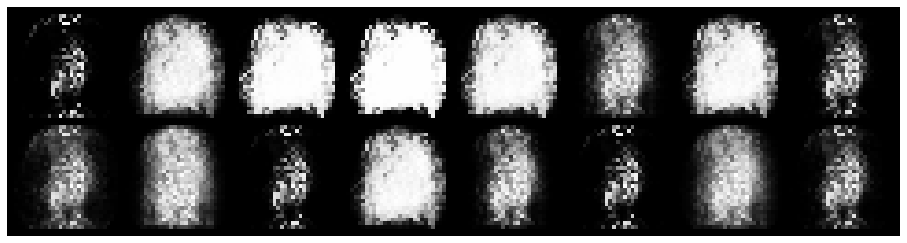

Epoch: [3/10], Batch Num: [0/300]
判别器损失: -453.7141, 生成器损失: -1961.8247
D(x): 2648.2310, D(G(z)): 2194.5168


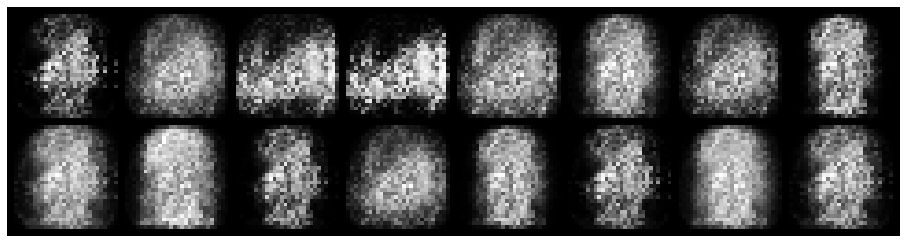

Epoch: [3/10], Batch Num: [100/300]
判别器损失: -1409.3187, 生成器损失: 397.0566
D(x): 1366.6523, D(G(z)): -42.6664


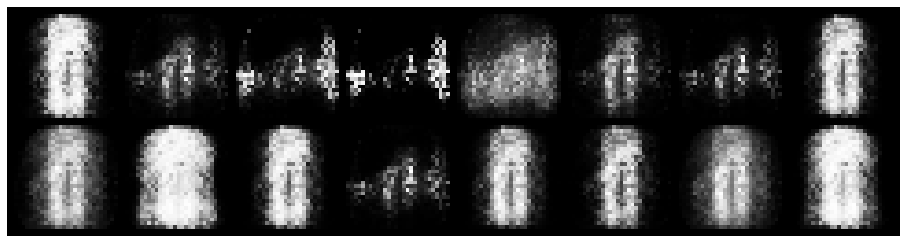

Epoch: [3/10], Batch Num: [200/300]
判别器损失: -197.0523, 生成器损失: -277.6407
D(x): 165.3813, D(G(z)): -31.6709


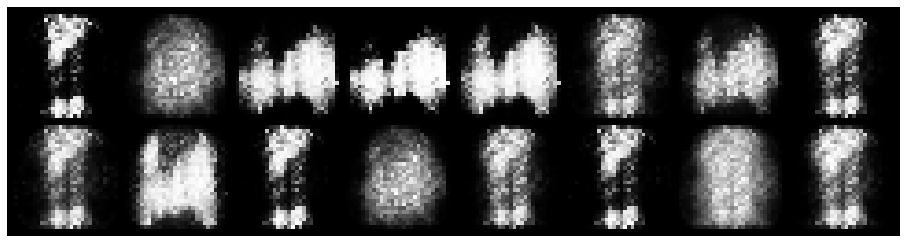

Epoch: [4/10], Batch Num: [0/300]
判别器损失: -139.0986, 生成器损失: -80.8597
D(x): 247.5376, D(G(z)): 108.4390


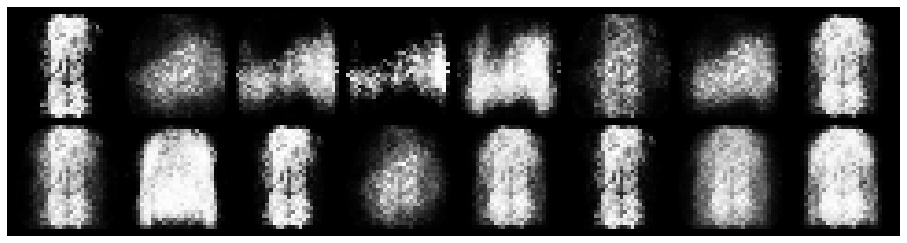

Epoch: [4/10], Batch Num: [100/300]
判别器损失: -436.7119, 生成器损失: 330.8313
D(x): -142.4741, D(G(z)): -579.1859


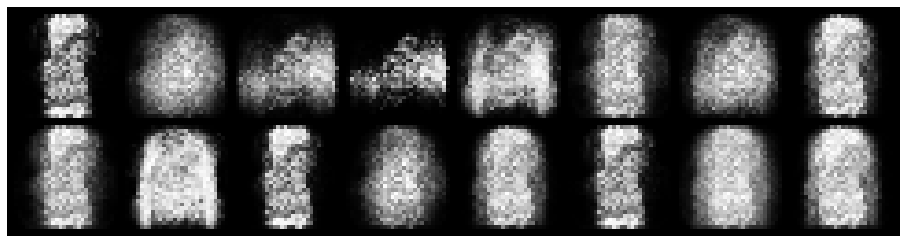

Epoch: [4/10], Batch Num: [200/300]
判别器损失: -553.4943, 生成器损失: 1481.0916
D(x): -539.0798, D(G(z)): -1092.5741


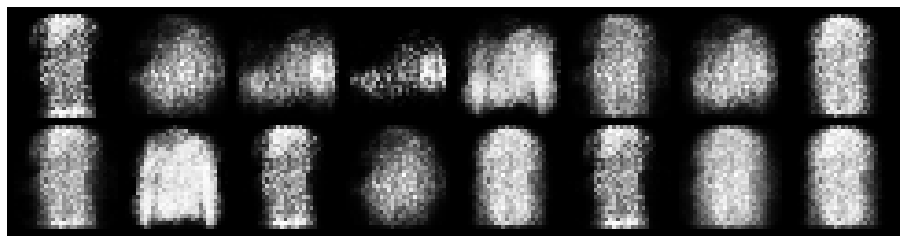

Epoch: [5/10], Batch Num: [0/300]
判别器损失: -443.1481, 生成器损失: -988.7926
D(x): 1870.5543, D(G(z)): 1427.4062


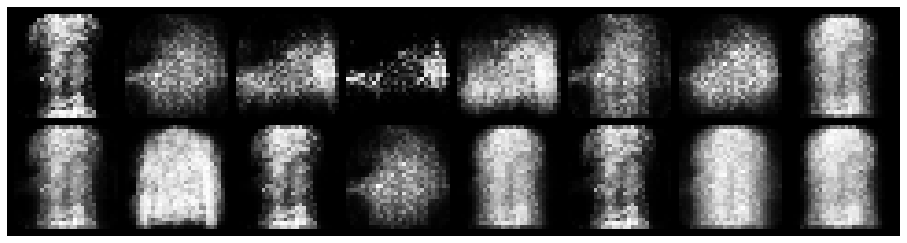

Epoch: [5/10], Batch Num: [100/300]
判别器损失: -353.7743, 生成器损失: 1307.9825
D(x): -644.7427, D(G(z)): -998.5170


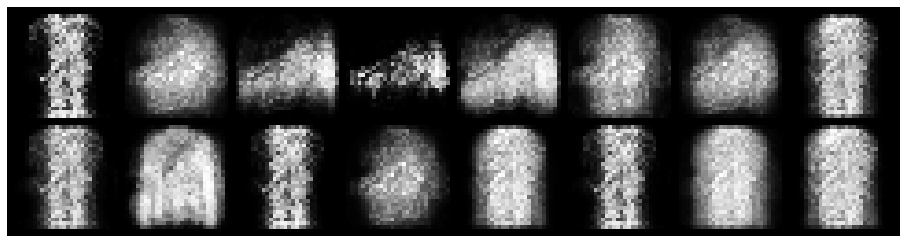

Epoch: [5/10], Batch Num: [200/300]
判别器损失: -502.0215, 生成器损失: 707.1763
D(x): -209.2592, D(G(z)): -711.2806


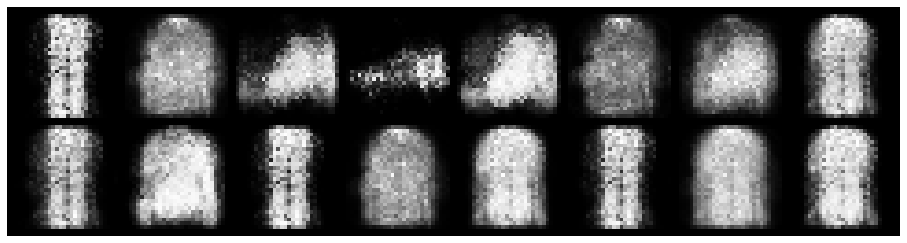

Epoch: [6/10], Batch Num: [0/300]
判别器损失: -510.2169, 生成器损失: -913.6373
D(x): 1277.4602, D(G(z)): 767.2433


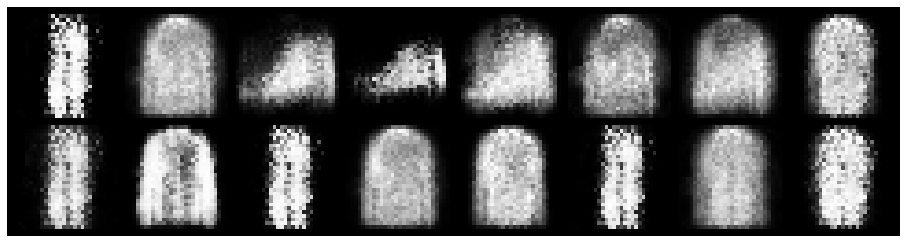

Epoch: [6/10], Batch Num: [100/300]
判别器损失: -596.6733, 生成器损失: -1356.4113
D(x): 2077.4827, D(G(z)): 1480.8093


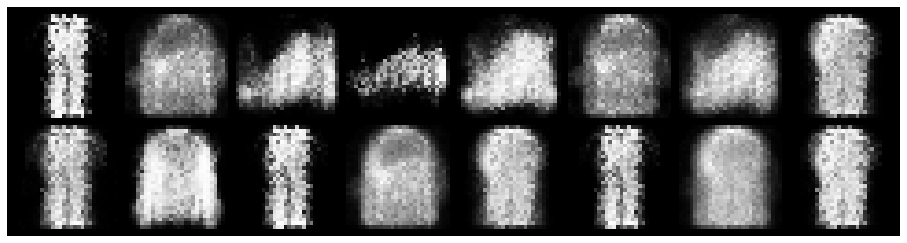

Epoch: [6/10], Batch Num: [200/300]
判别器损失: -697.9278, 生成器损失: 204.2028
D(x): 846.0128, D(G(z)): 148.0850


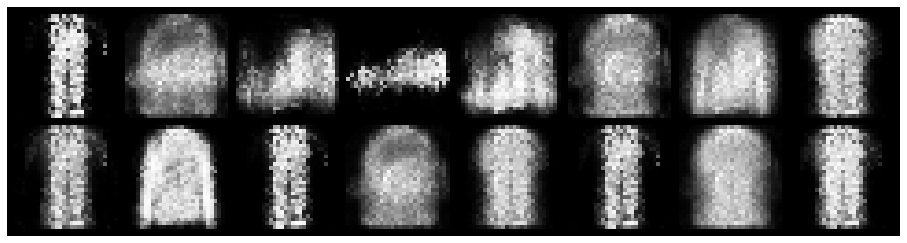

Epoch: [7/10], Batch Num: [0/300]
判别器损失: -674.1981, 生成器损失: -930.5703
D(x): 1316.5437, D(G(z)): 642.3456


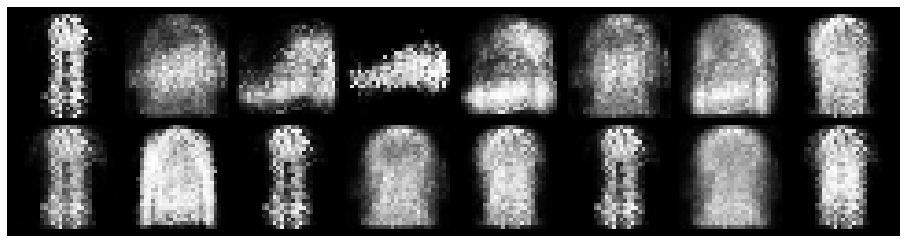

Epoch: [7/10], Batch Num: [100/300]
判别器损失: -528.3266, 生成器损失: -174.9645
D(x): 740.9160, D(G(z)): 212.5894


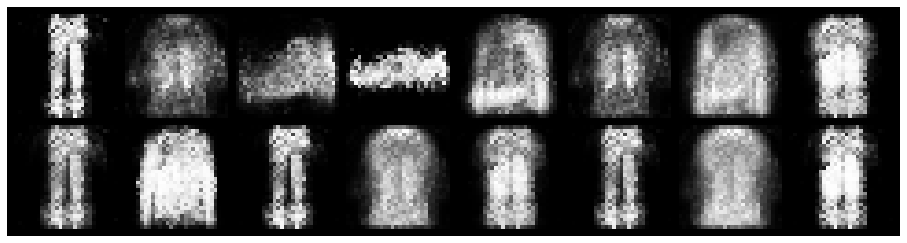

Epoch: [7/10], Batch Num: [200/300]
判别器损失: -700.9216, 生成器损失: -401.2320
D(x): 1118.4128, D(G(z)): 417.4912


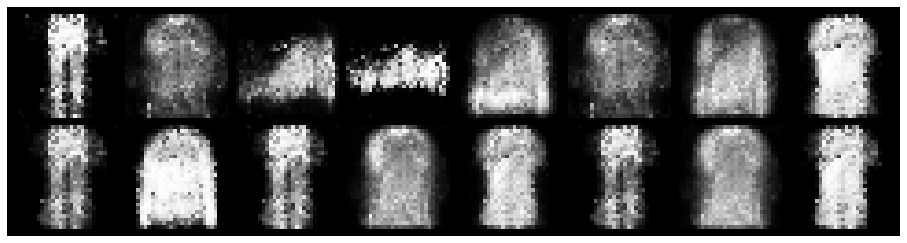

Epoch: [8/10], Batch Num: [0/300]
判别器损失: -478.3486, 生成器损失: -644.3585
D(x): 1169.3165, D(G(z)): 690.9679


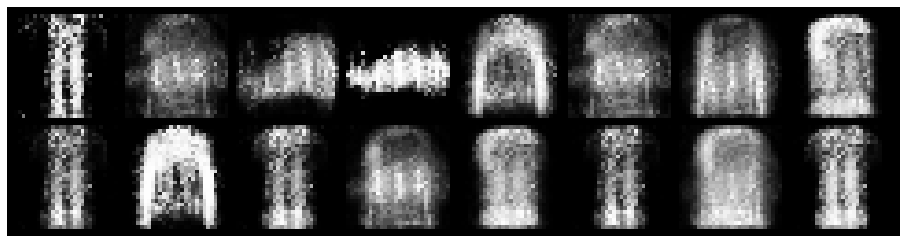

Epoch: [8/10], Batch Num: [100/300]
判别器损失: -795.5437, 生成器损失: 316.5859
D(x): 490.4783, D(G(z)): -305.0654


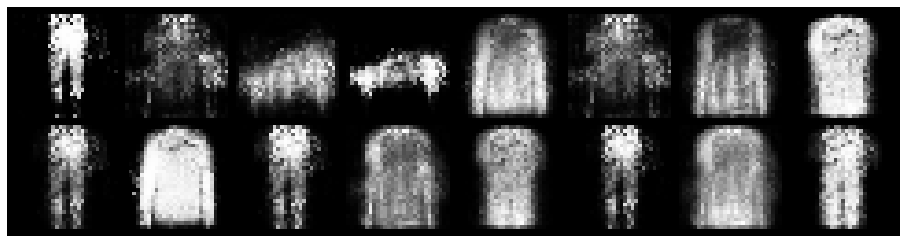

Epoch: [8/10], Batch Num: [200/300]
判别器损失: -281.0868, 生成器损失: -157.6666
D(x): 592.1044, D(G(z)): 311.0176


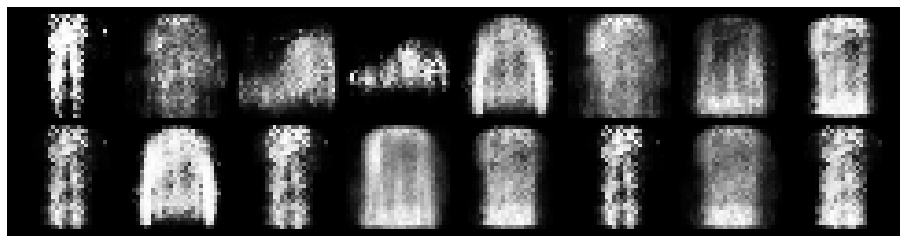

Epoch: [9/10], Batch Num: [0/300]
判别器损失: -791.3146, 生成器损失: -1711.7495
D(x): 2175.7393, D(G(z)): 1384.4247


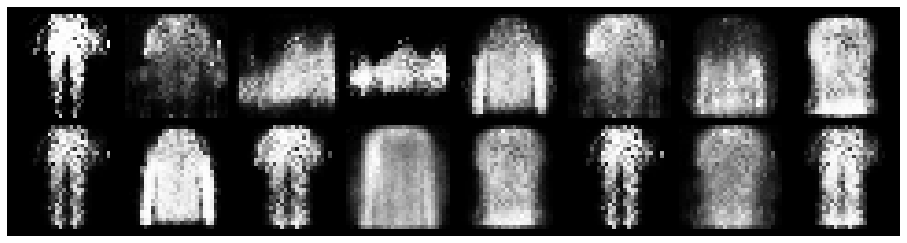

Epoch: [9/10], Batch Num: [100/300]
判别器损失: -615.7571, 生成器损失: 1411.7734
D(x): -344.3322, D(G(z)): -960.0893


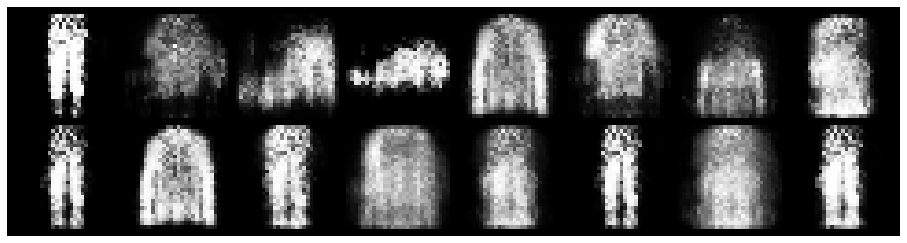

Epoch: [9/10], Batch Num: [200/300]
判别器损失: -605.7158, 生成器损失: -1129.1628
D(x): 1389.1987, D(G(z)): 783.4829


In [8]:
logger = Logger(model_name='WGAN(0.5)', data_name='FMNIST')

train_loss_g = []
train_loss_d = []
num_epochs = 10
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        
        N = real_batch.size(0)
        real_data = Variable(images_to_vectors(real_batch))
        d_optimizer.zero_grad()
        z = noise(N)

        fake_data = generator(z).detach()
        prediction_real = discriminator(real_data)
        prediction_fake = discriminator(fake_data)
        
        d_error = -torch.mean(prediction_real) + torch.mean(prediction_fake)
        train_loss_d.append(d_error)
        d_error.backward()
        d_optimizer.step()
        
        for p in discriminator.parameters():
             p.data.clamp_(-0.05, 0.05)
        
        if (n_batch) % 5 == 0:
            g_optimizer.zero_grad()
            
            fake_dt = generator(z)
            g_error = -torch.mean(discriminator(fake_dt))
            train_loss_g.append(g_error)
            g_error.backward()
            g_optimizer.step()

        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, prediction_real, prediction_fake)
            
            

### 步骤7 权重clip合适

In [10]:
discriminator1 = DiscriminatorNet()
generator1 = GeneratorNet()
d_optimizer1 = optim.RMSprop(discriminator1.parameters(), lr=0.0002)
g_optimizer1 = optim.Adam(generator1.parameters(), lr=0.0002)

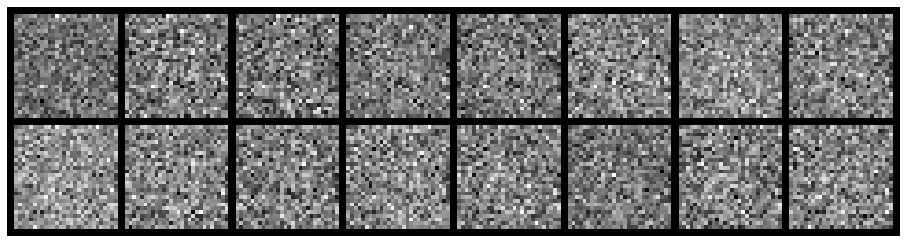

Epoch: [0/10], Batch Num: [0/300]
判别器损失: -0.0080, 生成器损失: -0.0047
D(x): 0.0245, D(G(z)): 0.0165


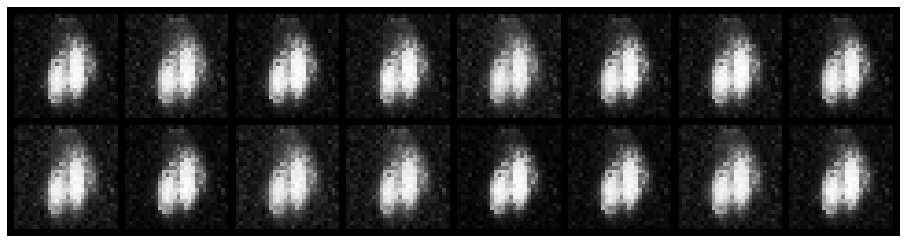

Epoch: [0/10], Batch Num: [100/300]
判别器损失: -3.5691, 生成器损失: -1.1676
D(x): 4.8971, D(G(z)): 1.3280


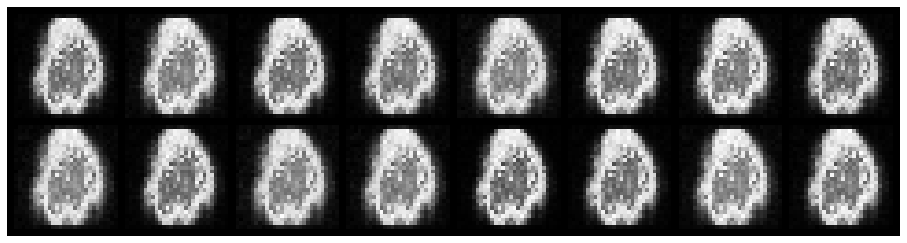

Epoch: [0/10], Batch Num: [200/300]
判别器损失: -4.0113, 生成器损失: 1.1765
D(x): 2.8164, D(G(z)): -1.1949


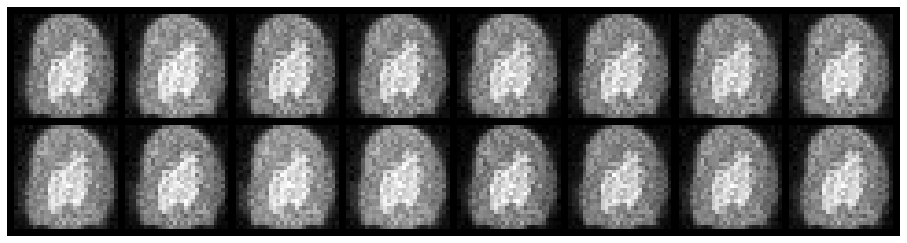

Epoch: [1/10], Batch Num: [0/300]
判别器损失: -3.0294, 生成器损失: -3.3397
D(x): 6.4650, D(G(z)): 3.4356


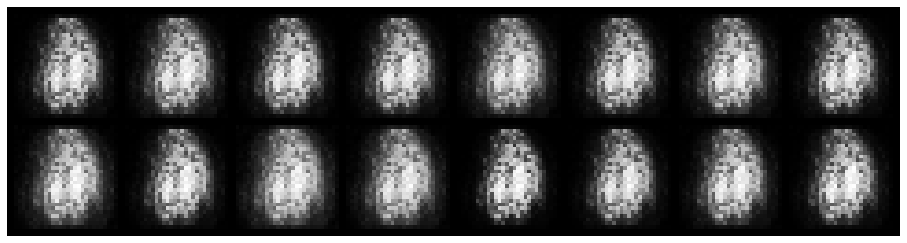

Epoch: [1/10], Batch Num: [100/300]
判别器损失: -4.0738, 生成器损失: 2.1341
D(x): 2.1170, D(G(z)): -1.9568


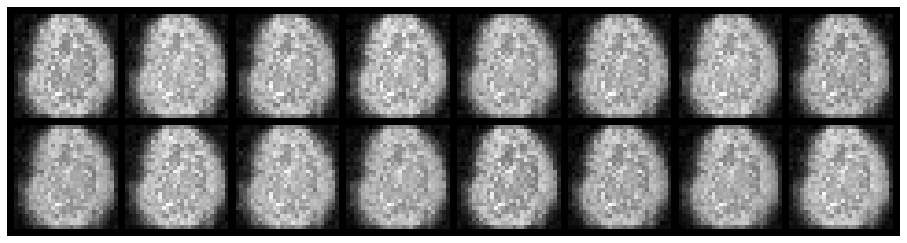

Epoch: [1/10], Batch Num: [200/300]
判别器损失: -3.5281, 生成器损失: 0.1217
D(x): 3.4634, D(G(z)): -0.0647


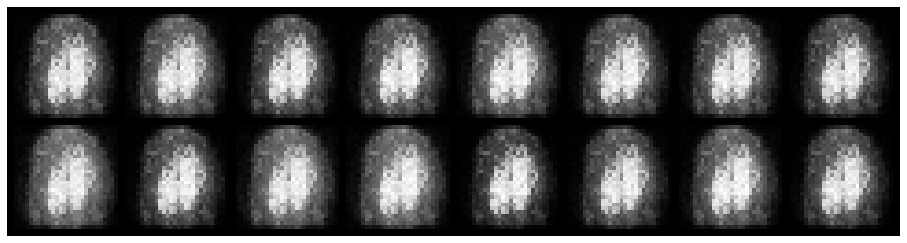

Epoch: [2/10], Batch Num: [0/300]
判别器损失: -1.2078, 生成器损失: 0.2884
D(x): 1.1799, D(G(z)): -0.0279


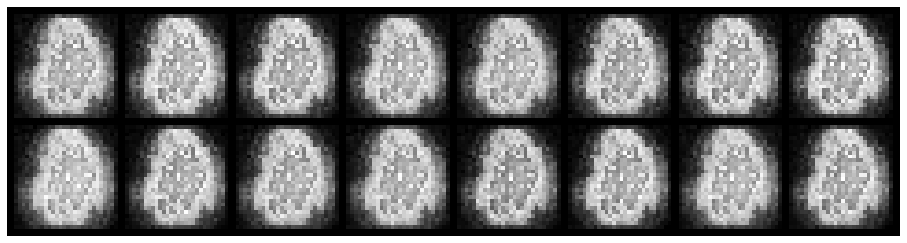

Epoch: [2/10], Batch Num: [100/300]
判别器损失: -2.8069, 生成器损失: 1.1391
D(x): 1.9915, D(G(z)): -0.8153


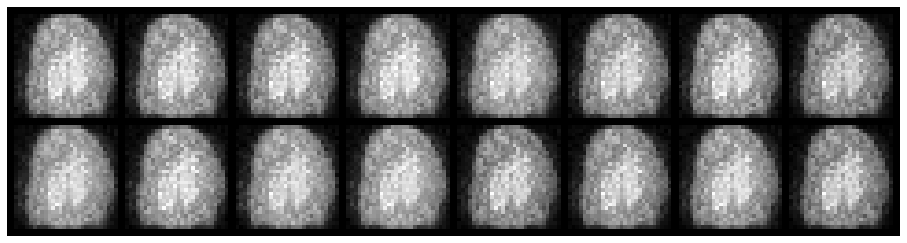

Epoch: [2/10], Batch Num: [200/300]
判别器损失: -2.1876, 生成器损失: -1.6788
D(x): 4.3206, D(G(z)): 2.1330


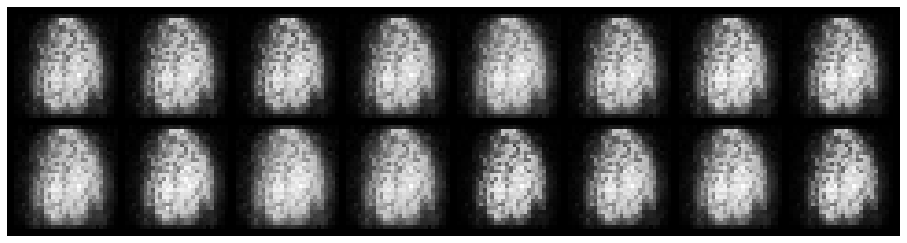

Epoch: [3/10], Batch Num: [0/300]
判别器损失: -2.8739, 生成器损失: 2.7336
D(x): 0.3083, D(G(z)): -2.5656


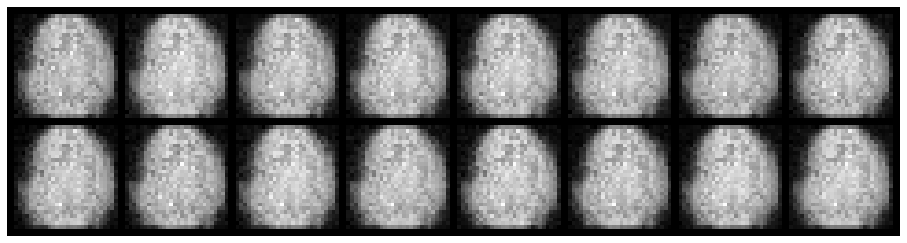

Epoch: [3/10], Batch Num: [100/300]
判别器损失: -3.2658, 生成器损失: -0.5526
D(x): 3.8176, D(G(z)): 0.5518


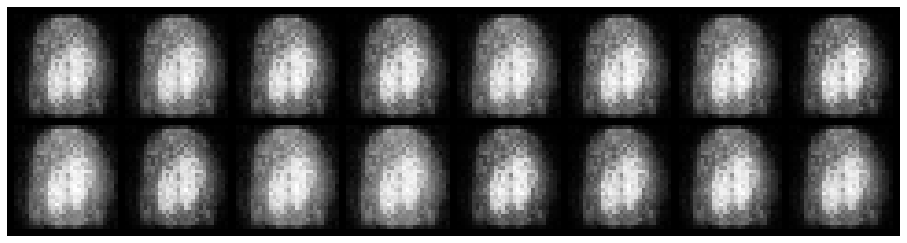

Epoch: [3/10], Batch Num: [200/300]
判别器损失: -1.0432, 生成器损失: -0.6611
D(x): 2.0183, D(G(z)): 0.9751


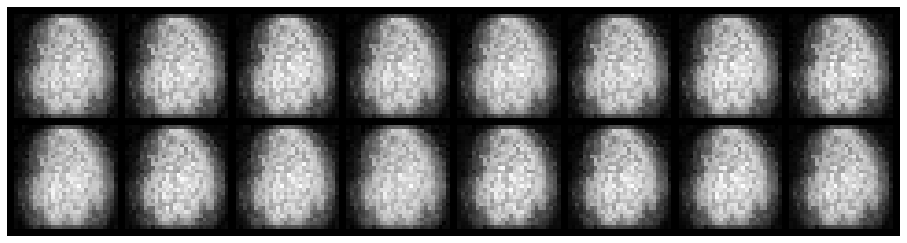

Epoch: [4/10], Batch Num: [0/300]
判别器损失: -1.3764, 生成器损失: -0.4586
D(x): 1.7679, D(G(z)): 0.3915


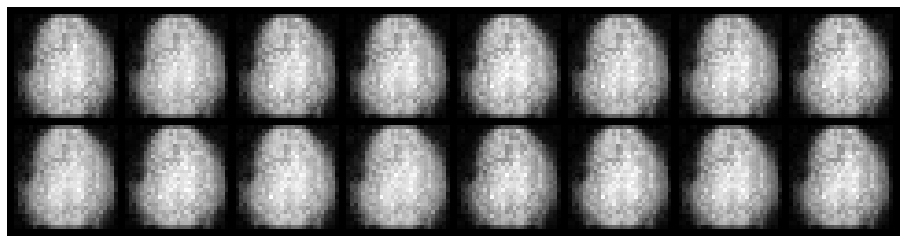

Epoch: [4/10], Batch Num: [100/300]
判别器损失: -2.6526, 生成器损失: -0.8836
D(x): 3.6802, D(G(z)): 1.0276


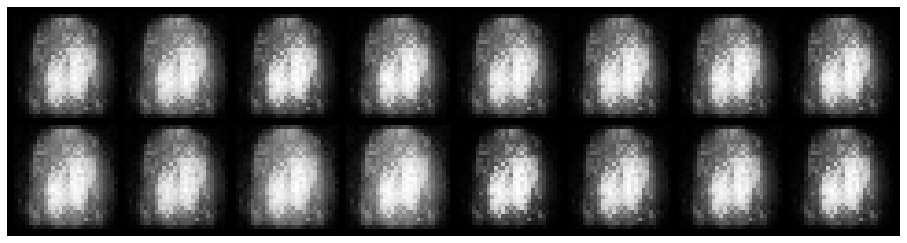

Epoch: [4/10], Batch Num: [200/300]
判别器损失: -2.8354, 生成器损失: 3.9363
D(x): -1.3412, D(G(z)): -4.1766


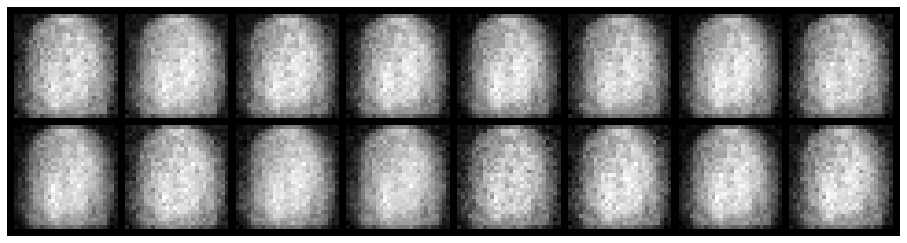

Epoch: [5/10], Batch Num: [0/300]
判别器损失: -1.6595, 生成器损失: -0.0600
D(x): 1.7637, D(G(z)): 0.1042


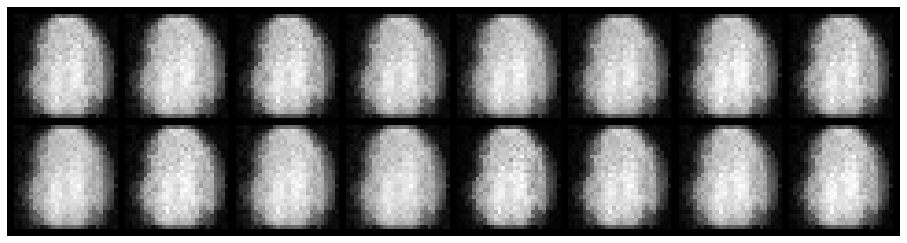

Epoch: [5/10], Batch Num: [100/300]
判别器损失: -1.8486, 生成器损失: -1.7602
D(x): 3.5279, D(G(z)): 1.6793


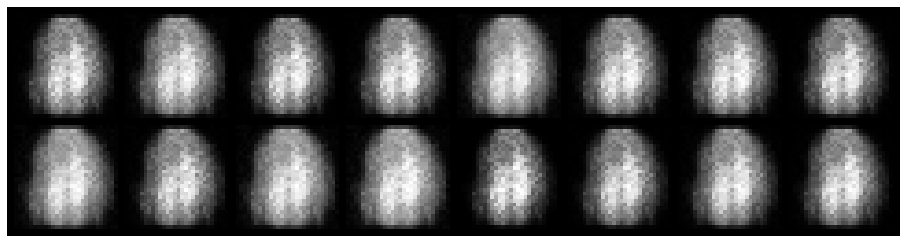

Epoch: [5/10], Batch Num: [200/300]
判别器损失: -2.8674, 生成器损失: 3.0187
D(x): -1.1363, D(G(z)): -4.0037


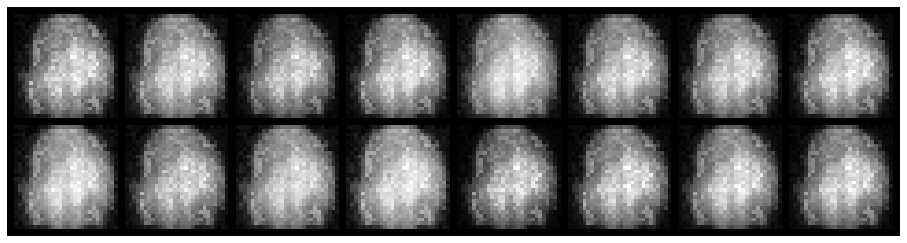

Epoch: [6/10], Batch Num: [0/300]
判别器损失: -1.3530, 生成器损失: 1.6748
D(x): -0.0669, D(G(z)): -1.4199


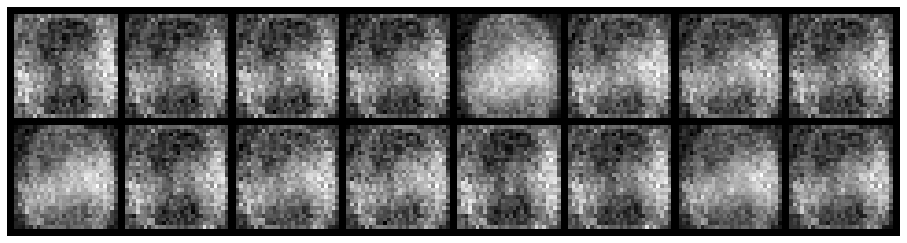

Epoch: [6/10], Batch Num: [100/300]
判别器损失: -0.9733, 生成器损失: -0.1935
D(x): 1.1688, D(G(z)): 0.1955


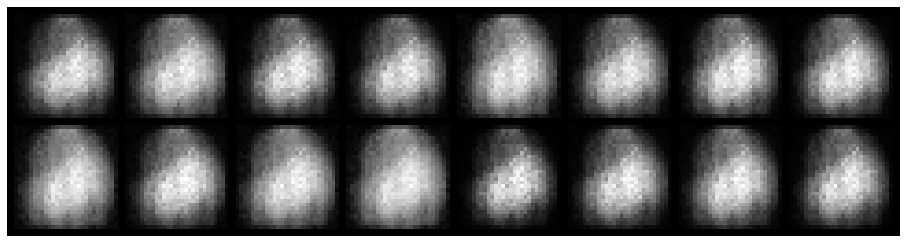

Epoch: [6/10], Batch Num: [200/300]
判别器损失: -4.1921, 生成器损失: -0.1625
D(x): 4.3048, D(G(z)): 0.1126


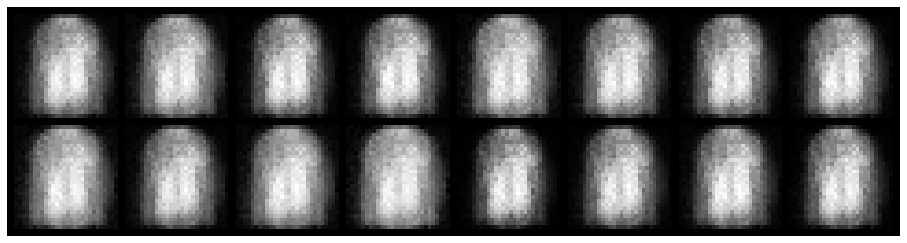

Epoch: [7/10], Batch Num: [0/300]
判别器损失: -2.0275, 生成器损失: 0.0109
D(x): 2.1661, D(G(z)): 0.1386


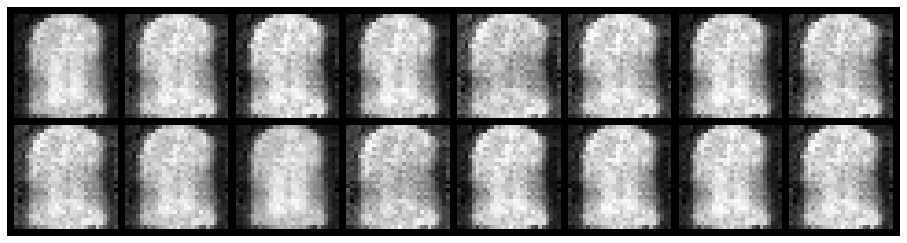

Epoch: [7/10], Batch Num: [100/300]
判别器损失: -0.9515, 生成器损失: -0.4339
D(x): 1.3896, D(G(z)): 0.4381


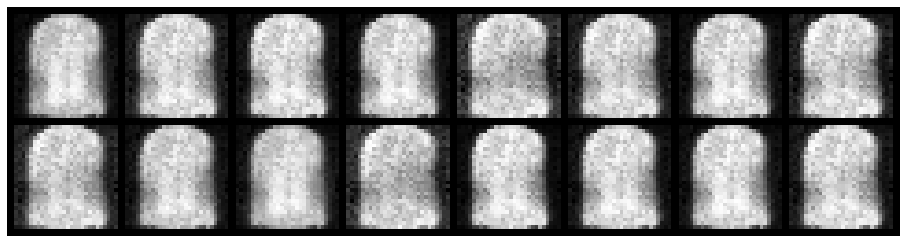

Epoch: [7/10], Batch Num: [200/300]
判别器损失: -3.7310, 生成器损失: 0.4843
D(x): 3.2796, D(G(z)): -0.4514


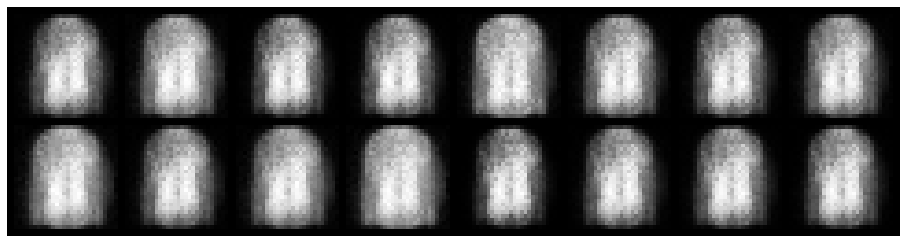

Epoch: [8/10], Batch Num: [0/300]
判别器损失: -1.5654, 生成器损失: 2.0249
D(x): -0.4171, D(G(z)): -1.9825


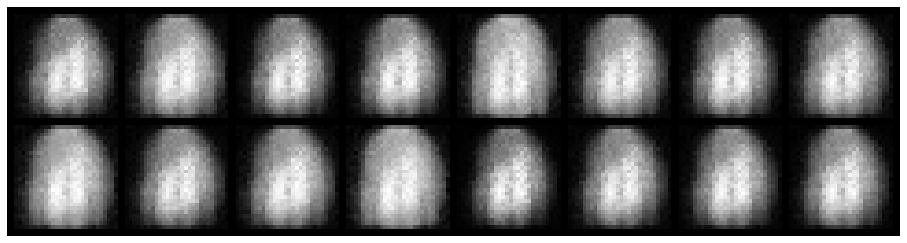

Epoch: [8/10], Batch Num: [100/300]
判别器损失: -0.9434, 生成器损失: 1.1185
D(x): -0.1918, D(G(z)): -1.1352


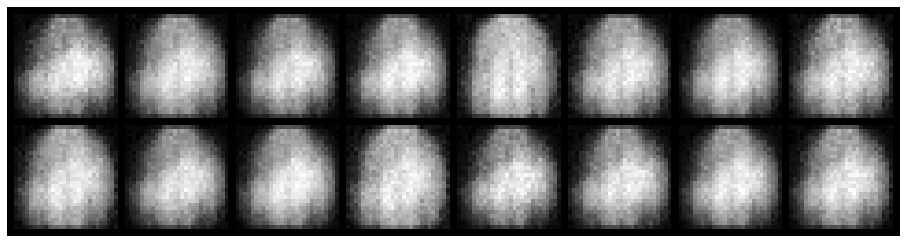

Epoch: [8/10], Batch Num: [200/300]
判别器损失: -0.1850, 生成器损失: 0.0679
D(x): 0.2140, D(G(z)): 0.0290


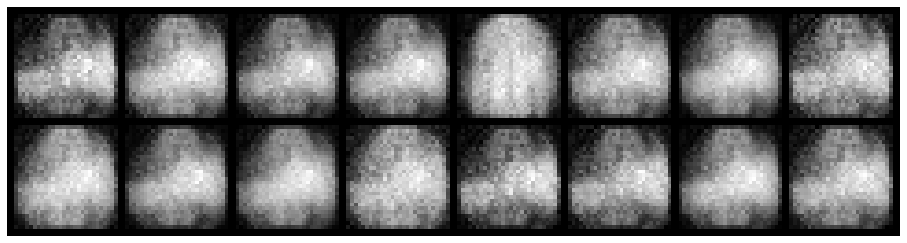

Epoch: [9/10], Batch Num: [0/300]
判别器损失: -0.2988, 生成器损失: 0.0802
D(x): 0.2435, D(G(z)): -0.0554


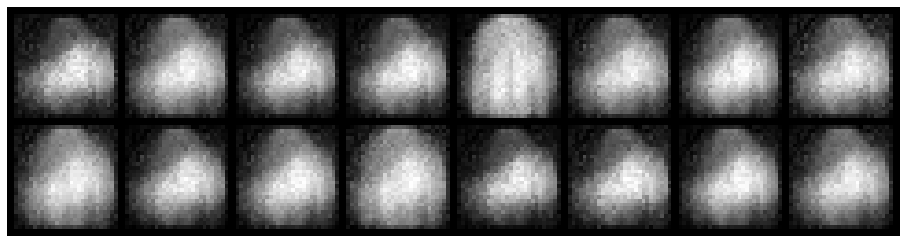

Epoch: [9/10], Batch Num: [100/300]
判别器损失: -1.1868, 生成器损失: -0.4618
D(x): 1.6363, D(G(z)): 0.4495


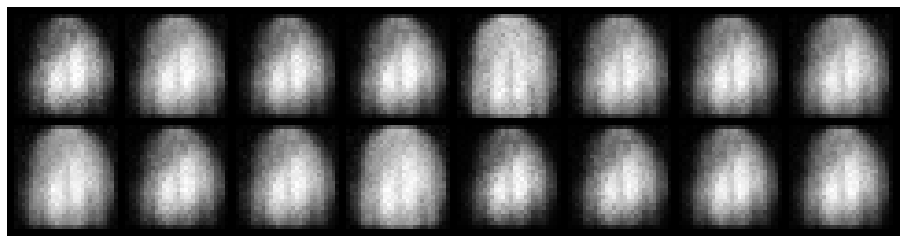

Epoch: [9/10], Batch Num: [200/300]
判别器损失: -0.6769, 生成器损失: -0.3084
D(x): 0.9929, D(G(z)): 0.3161


In [11]:
logger = Logger(model_name='WGAN(0.001)', data_name='FMNIST')

train_loss_g0001 = []
train_loss_d0001 = []
num_epochs = 10
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        
        N = real_batch.size(0)
        real_data = Variable(images_to_vectors(real_batch))
        d_optimizer1.zero_grad()
        z = noise(N)

        fake_data = generator1(z).detach()
        prediction_real = discriminator1(real_data)
        prediction_fake = discriminator1(fake_data)
        
        d_error = -torch.mean(prediction_real) + torch.mean(prediction_fake)
        train_loss_d0001.append(d_error)
        d_error.backward()
        d_optimizer1.step()
        
        for p in discriminator1.parameters():
             p.data.clamp_(-0.005, 0.005)
        
        if (n_batch) % 5 == 0:
            g_optimizer1.zero_grad()
            
            fake_dt = generator1(z)
            g_error = -torch.mean(discriminator1(fake_dt))
            train_loss_g0001.append(g_error)
            g_error.backward()
            g_optimizer1.step()

        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator1(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, prediction_real, prediction_fake)
            

### 步骤8 权重clip过小